In [1]:
import os
instance_files = os.listdir("data/method_outputs/")
instance_files

['bur26a']

In [3]:
size = 26

In [ ]:
data = []
times = []
for i in instance_files:
    method_files = os.listdir("data/method_outputs/" + i)
    for m in method_files:
        txt_files = os.listdir("data/method_outputs/" + i + "/" + m)
        for file in txt_files:
            if (file !="Time.txt"):
                path = "data/method_outputs/" + i +"/"+ m +"/"+ file
                with open(path, 'r') as f:
                    lines = f.readlines()
                    size = int(lines[0].strip()) if lines[0].strip().isdigit() else None
                    starting = int(lines[1].strip()) if lines[1].strip().isdigit() else None
                    initialSolution = []
                    for line in lines[2:size+2]: 
                        initialSolution.append(int(line.strip()))
                    steps = int(lines[size+2].strip()) if lines[size+2].strip().isdigit() else None
                    evals = int(lines[size+3].strip()) if lines[size+3].strip().isdigit() else None
                    value = int(lines[size+4].strip()) if lines[size+4].strip().isdigit() else None
                    solution = []
                    for line in lines[size+6:]:  
                        solution.append(int(line.strip()))

                    result = {
                        'method': m,
                        'instance': i,
                        'run': file.split('.')[0],
                        'size': size,
                        'steps': steps,
                        'evals': evals,
                        'f_val': value,
                        'start_val': starting,
                        'initial': initialSolution,
                        'solution': solution
                    }
                    data.append(result)
            else:
                path = "data/method_outputs/" + i +"/"+ m +"/"+ file
                with open(path, 'r') as f:
                    lines = f.readlines()
                    fullTime = []
                    for line in lines[:10]:  
                        fullTime.append(int(line.strip()))
                    bestCost = int(lines[10].strip())
                    bestSol = []
                    for line in lines[11:]:  
                        bestSol.append(int(line.strip()))

                    time = {
                        'method':m,
                        'instance': i,
                        'bestFit': bestCost,
                        'bestSol': bestSol,
                        'time': fullTime,
                    }
                    times.append(time)

        

    

In [39]:
print(data[0:5])

[{'method': 'Custom', 'instance': 'bur26a', 'run': '1', 'steps': 171, 'evals': 4900, 'f_val': 5940880, 'initial': [23, 24, 3, 11, 9, 21, 13, 2, 10, 5, 16, 14, 20, 19, 1, 0, 12, 22, 25, 6, 4, 15, 8, 7, 17, 18], 'solution': [20, 12, 16, 2, 0, 15, 4, 14, 23, 7, 11, 13, 25, 19, 10, 18, 5, 22, 3, 21, 1, 9, 24, 17, 6, 8]}, {'method': 'Custom', 'instance': 'bur26a', 'run': '10', 'steps': 171, 'evals': 4900, 'f_val': 5940880, 'initial': [2, 22, 16, 4, 19, 25, 9, 14, 5, 10, 18, 6, 7, 13, 12, 24, 11, 8, 21, 23, 20, 17, 1, 0, 3, 15], 'solution': [20, 12, 16, 2, 0, 15, 4, 14, 23, 7, 11, 13, 25, 19, 10, 18, 5, 22, 3, 21, 1, 9, 24, 17, 6, 8]}, {'method': 'Custom', 'instance': 'bur26a', 'run': '2', 'steps': 171, 'evals': 4900, 'f_val': 5940880, 'initial': [19, 5, 10, 22, 4, 0, 1, 6, 25, 17, 21, 18, 8, 23, 3, 24, 16, 13, 11, 7, 9, 15, 20, 2, 14, 12], 'solution': [20, 12, 16, 2, 0, 15, 4, 14, 23, 7, 11, 13, 25, 19, 10, 18, 5, 22, 3, 21, 1, 9, 24, 17, 6, 8]}, {'method': 'Custom', 'instance': 'bur26a', '

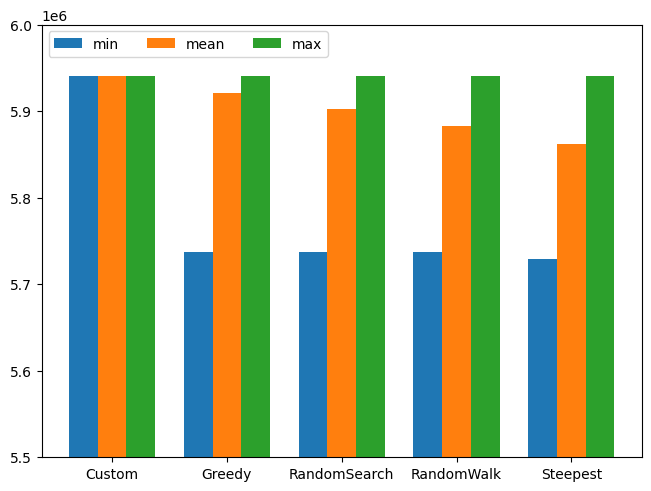

In [58]:
import matplotlib.pyplot as plt
import numpy as np

x_names = [data[n*10]["method"] for n in range(5)]
y = [y["f_val"] for y in data]
y_mean = [round(np.mean(y[i:i+10])) for i in range(5)]
y_max = [max(y[i:i+10]) for i in range(5)]
y_min =[min(y[i:i+10]) for i in range(5)]

fig, ax = plt.subplots(layout="constrained")
y_s = [y_min, y_mean, y_max]
x = np.arange(len(x))
rects = ax.bar(x, y_min, 0.25, label = "min")
#ax.bar_label(rects, padding=3)
rects2 = ax.bar(x+0.25,y_mean, 0.25, label = "mean")
#ax.bar_label(rects2, padding=3, )
rects3 = ax.bar(x+0.5, y_max, 0.25, label = "max")
#ax.bar_label(rects3, padding=3)
ax.set_xticks(x + 0.25, x_names)
ax.legend(loc='upper left', ncols=3)
plt.ylim([5500000, 6000000])
plt.show()

['Custom', 'Greedy', 'RandomSearch', 'RandomWalk', 'Steepest'] [np.float64(171.0), np.float64(159.1), np.float64(144.2), np.float64(132.2), np.float64(120.6)]


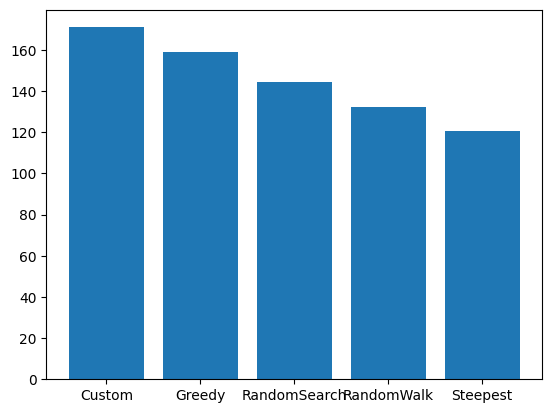

In [41]:

y_step = [y["steps"] for y in data]
y_step = [np.mean(y_step[i:i+10]) for i in range(5)]
print(x, y_step)
plt.bar(x, y_step)
plt.show()

['Custom', 'Greedy', 'RandomSearch', 'RandomWalk', 'Steepest'] [np.float64(5940880.0), np.float64(5920455.7), np.float64(5902811.6), np.float64(5882904.4), np.float64(5861747.7)]


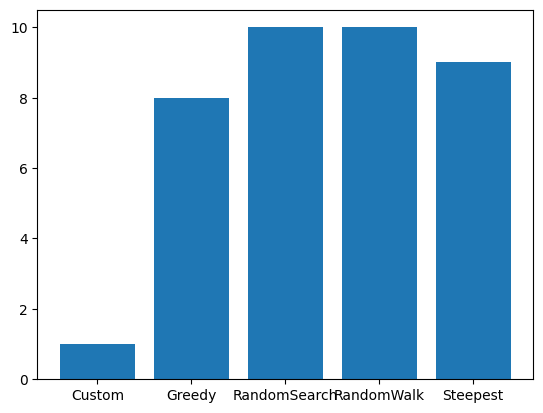

In [43]:

y_once = [y["oneTime"] for y in times]
print(x, y)
plt.bar([i["method"] for i in times], y_once)
plt.show()